# Название проекта: "Анализ и визуализация QS World University Rankings 2024: что влияет на позиции вузов в мире?" 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df= pd.read_csv('D:\Alena\Projects\petproject1/2024QSWorldUniRan.csv', delimiter=',')
df = df.iloc[1:]  
df.reset_index(drop=True, inplace=True) 

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\PSW\AppData\Local\Temp\ipykernel_20228\1813512884.py:1: SyntaxWarning: invalid escape sequence '\A'
  df= pd.read_csv('D:\Alena\Projects\petproject1/2024QSWorldUniRan.csv', delimiter=',')


EDA и обработка данных (очистка, подготовка данных для анализа)

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   2024 RANK                             1497 non-null   object
 1   2023 RANK                             1415 non-null   object
 2   Institution Name                      1497 non-null   object
 3   Country Code                          1497 non-null   object
 4   Country                               1497 non-null   object
 5   SIZE                                  1474 non-null   object
 6   FOCUS                                 1496 non-null   object
 7   RES.                                  1410 non-null   object
 8   AGE                                   1471 non-null   object
 9   STATUS                                1455 non-null   object
 10  Academic Reputation Score             1497 non-null   object
 11  Academic Reputation Rank      

In [4]:
pd.set_option('display.max_columns', None)
df.describe(include='all').T 

,count,unique,top,freq
2024 RANK,1497,379,1201-1400,206
2023 RANK,1415,333,801-1000,204
Institution Name,1497,1497,Zürcher Hochschule Winterthur,1
Country Code,1497,104,US,199
Country,1497,104,United States,199
SIZE,1474,4,L,688
FOCUS,1496,4,FC,595
RES.,1410,4,VH,922
AGE,1471,5,5,543
STATUS,1455,3,A,1157


In [5]:
df.isnull().sum()

2024 RANK                                 0
2023 RANK                                82
Institution Name                          0
Country Code                              0
Country                                   0
SIZE                                     23
FOCUS                                     1
RES.                                     87
AGE                                      26
STATUS                                   42
Academic Reputation Score                 0
Academic Reputation Rank                  0
Employer Reputation Score                 1
Employer Reputation Rank                  1
Faculty Student Score                    24
Faculty Student Rank                     24
Citations per Faculty Score              24
Citations per Faculty Rank               24
International Faculty Score             126
International Faculty Rank              126
International Students Score             80
International Students Rank              80
International Research Network S

In [6]:
df.tail(20)

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,Academic Reputation Score,Academic Reputation Rank,Employer Reputation Score,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
1477,1401+,1201-1400,Universidade Federal de Goiás,BR,Brazil,XL,CO,VH,4,A,3.6,601+,1.6,601+,7.1,701+,4.2,701+,3.7,701+,1.3,701+,1.5,701+,3.8,701+,1.4,701+,-
1478,1401+,1201-1400,Universidade Federal de Uberlândia,BR,Brazil,L,FC,HI,3,A,3.6,601+,1.9,601+,12.6,701+,3.5,701+,2.2,701+,1.3,701+,1.8,701+,3.8,701+,10.9,658=,-
1479,1401+,1201-1400,Universidade Federal do Estado do Rio de Janei...,BR,Brazil,L,FC,MD,4,A,3.2,601+,1.9,601+,10.0,701+,2.1,701+,NaN,NaN,NaN,NaN,1.0,701+,3.8,701+,1,701+,-
1480,1401+,1201-1400,Universidade Federal do Parà - UFPA,BR,Brazil,XL,FC,HI,4,A,3.4,601+,1.8,601+,6.7,701+,2.5,701+,2.8,701+,1.1,701+,1.9,701+,3.8,701+,6.4,701+,-
1481,1401+,1201-1400,Universidade Federal do Rio Grande Do Norte,BR,Brazil,XL,FC,HI,4,A,4.6,601+,1.5,601+,8.6,701+,3.2,701+,NaN,NaN,NaN,NaN,5.6,701+,3.8,701+,1.4,701+,-
1482,1401+,1201-1400,Universitas Andalas,ID,Indonesia,XL,CO,HI,4,A,6.9,601+,3.9,601+,4.9,701+,1.4,701+,2.1,701+,1.1,701+,1.0,701+,6.1,701+,1.1,701+,-
1483,1401+,NaN,Universitas Kristen Petra,ID,Indonesia,M,FO,HI,4,C,6.1,601+,4.2,601+,7.3,701+,1.6,701+,2.7,701+,1.4,701+,1.0,701+,8.1,701+,NaN,NaN,-
1484,1401+,1201-1400,Universitas Muhammadiyah Surakarta,ID,Indonesia,L,FO,HI,3,B,5.3,601+,2.4,601+,7.8,701+,1.1,701+,6.5,701+,1.1,701+,1.0,701+,7.1,701+,1.4,701+,-
1485,1401+,NaN,Université Sorbonne Paris Nord,FR,France,NaN,CO,NaN,NaN,NaN,9.5,601+,5.1,601+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3,611,NaN,NaN,NaN,NaN,-
1486,1401+,1401+,University of Craiova,RO,Romania,L,CO,HI,4,A,4.1,601+,2.0,601+,2.9,701+,2.0,701+,NaN,NaN,NaN,NaN,1.1,701+,7.9,701+,1,701+,-


Преобразование данных в числовой формат.

In [7]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

In [8]:
def extract_mean_rank(rank): 
    if pd.isnull(rank):
        return None
    
    rank = str(rank).strip()
    
    if not any(char.isdigit() for char in rank):
        return None
    
    try:
        if '+' in rank:
            return int(rank.replace('+', ''))
        elif '=' in rank:
            return int(rank.replace('=', ''))
        elif '-' in rank:
            a, b = map(int, rank.split('-'))
            return (a + b) / 2
        else:
            return int(rank)
    except:
        return None

df['2024 RANK'] = df['2024 RANK'].apply(extract_mean_rank)
df['2023 RANK'] = df['2023 RANK'].apply(extract_mean_rank)
df['Academic Reputation Rank'] = df['Academic Reputation Rank'].apply(extract_mean_rank)
df['Employer Reputation Rank'] = df['Employer Reputation Rank'].apply(extract_mean_rank)
df['Faculty Student Rank'] = df['Faculty Student Rank'].apply(extract_mean_rank)
df['Citations per Faculty Rank'] = df['Citations per Faculty Rank'].apply(extract_mean_rank)
df['International Faculty Rank'] = df['International Faculty Rank'].apply(extract_mean_rank)
df['International Students Rank'] = df['International Students Rank'].apply(extract_mean_rank)
df['International Research Network Rank'] = df['International Research Network Rank'].apply(extract_mean_rank)
df['Employment Outcomes Rank'] = df['Employment Outcomes Rank'].apply(extract_mean_rank)
df['Sustainability Rank'] = df['Sustainability Rank'].apply(extract_mean_rank)
       

In [9]:
score_columns = [col for col in df.columns if 'Score' in col or 'SCORE' in col]
for col in score_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Заполнение пропущенных значений медианой и модой, удаление строк с минимальным количеством пропусков.

In [10]:
df['2023 RANK'] = df['2023 RANK'].fillna(df['2023 RANK'].median())
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['Faculty Student Score'] = df['Faculty Student Score'].fillna(df['Faculty Student Score'].median())
df['Faculty Student Rank' ] = df['Faculty Student Rank'].fillna(df['Faculty Student Rank'].median())
df['Citations per Faculty Score' ] = df['Citations per Faculty Score'].fillna(df['Citations per Faculty Score'].median())
df['Citations per Faculty Rank' ] = df['Citations per Faculty Rank'].fillna(df['Citations per Faculty Rank'].median())     
df['Employment Outcomes Score' ] = df['Employment Outcomes Score'].fillna(df['Employment Outcomes Score'].median())     
df['Employment Outcomes Rank' ] = df['Employment Outcomes Rank'].fillna(df['Employment Outcomes Rank'].median()) 
                   
imputer = SimpleImputer(strategy='most_frequent') 
categorical_cols = ['SIZE', 'RES.', 'STATUS']  
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

df = df.dropna(subset=['FOCUS'])
df = df.dropna(subset=['Employer Reputation Score'])
df = df.dropna(subset=['International Research Network Score'])

In [11]:
df.isnull().sum()

2024 RANK                                 0
2023 RANK                                 0
Institution Name                          0
Country Code                              0
Country                                   0
SIZE                                      0
FOCUS                                     0
RES.                                      0
AGE                                       0
STATUS                                    0
Academic Reputation Score                 0
Academic Reputation Rank                  0
Employer Reputation Score                 0
Employer Reputation Rank                  0
Faculty Student Score                     0
Faculty Student Rank                      0
Citations per Faculty Score               0
Citations per Faculty Rank                0
International Faculty Score             124
International Faculty Rank              124
International Students Score             78
International Students Rank              78
International Research Network S

Восстановление данных с помощью класса IterativeImputer.

In [12]:
impute_cols = [
    'International Faculty Score',
    'International Faculty Rank',
    'International Students Score',
    'International Students Rank',
    'Sustainability Rank',
    'Sustainability Score'
]
imputer = IterativeImputer(random_state=0)
df[impute_cols] = imputer.fit_transform(df[impute_cols])
# df[impute_cols].isnull().sum()

c:\Users\PSW\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
df.isnull().sum()

2024 RANK                                 0
2023 RANK                                 0
Institution Name                          0
Country Code                              0
Country                                   0
SIZE                                      0
FOCUS                                     0
RES.                                      0
AGE                                       0
STATUS                                    0
Academic Reputation Score                 0
Academic Reputation Rank                  0
Employer Reputation Score                 0
Employer Reputation Rank                  0
Faculty Student Score                     0
Faculty Student Rank                      0
Citations per Faculty Score               0
Citations per Faculty Rank                0
International Faculty Score               0
International Faculty Rank                0
International Students Score              0
International Students Rank               0
International Research Network S

Восстановление данных OVERALL SCORE  с помощью регрессионной модели RandomForestRegressor. Для восстановления использованы девять ключевых показателей, на которых основана методология QS World University Rankings:

Academic Reputation - 30%  

Citations per Faculty - 20% 

Employer Reputation - 15%  

Employment Outcomes - 5% 

Faculty Student Ratio - 10% 

International Faculty Ratio - 5% 

International Research Network - 5%  

International Student Ratio -5%

Sustainability  - 5%  

In [14]:
features = [
    'Academic Reputation Score',          
'Employer Reputation Score',              
'Sustainability Score',                    
'Employment Outcomes Score',              
'International Research Network Score',    
'Citations per Faculty Score',          
'International Faculty Score',          
'International Students Score',            
'Faculty Student Score'  
]

df_known = df[df['Overall SCORE'].notna()]
df_missing = df[df['Overall SCORE'].isna()]

X = df_known[features]
y = df_known['Overall SCORE']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

df.loc[df['Overall SCORE'].isna(), 'Overall SCORE'] = model.predict(df_missing[features])

In [15]:
df.isnull().sum()

2024 RANK                               0
2023 RANK                               0
Institution Name                        0
Country Code                            0
Country                                 0
SIZE                                    0
FOCUS                                   0
RES.                                    0
AGE                                     0
STATUS                                  0
Academic Reputation Score               0
Academic Reputation Rank                0
Employer Reputation Score               0
Employer Reputation Rank                0
Faculty Student Score                   0
Faculty Student Rank                    0
Citations per Faculty Score             0
Citations per Faculty Rank              0
International Faculty Score             0
International Faculty Rank              0
International Students Score            0
International Students Rank             0
International Research Network Score    0
International Research Network Ran

In [16]:
df.tail(10)

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,Academic Reputation Score,Academic Reputation Rank,Employer Reputation Score,Employer Reputation Rank,Faculty Student Score,Faculty Student Rank,Citations per Faculty Score,Citations per Faculty Rank,International Faculty Score,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
1487,1401.0,725.5,University of Ibadan,NG,Nigeria,L,CO,VH,4.0,A,9.0,601,6.6,601.0,16.7,701.0,10.4,701.0,30.782622,526.050933,25.612507,530.741209,8.2,701.0,11.7,701.0,25.411729,524.965845,20.587
1488,1401.0,1300.5,University of Kragujevac,RS,Serbia,L,FO,VH,3.0,A,4.0,601,2.4,601.0,10.3,701.0,3.6,701.0,1.000000,701.000000,1.100000,701.000000,2.7,701.0,9.2,701.0,1.000000,701.000000,20.911
1489,1401.0,725.5,University of Lagos,NG,Nigeria,L,CO,VH,4.0,A,7.4,601,5.6,601.0,16.7,701.0,10.4,701.0,30.782622,526.050933,25.612507,530.741209,1.5,701.0,11.7,701.0,25.411729,524.965845,20.622
1490,1401.0,725.5,University of Lampung,ID,Indonesia,L,FC,MD,4.0,A,3.4,601,1.8,601.0,4.7,701.0,1.3,701.0,1.000000,701.000000,1.000000,701.000000,1.0,701.0,5.8,701.0,23.109988,536.085368,21.114
1491,1401.0,725.5,University of Mataram,ID,Indonesia,L,FO,MD,4.0,A,4.9,601,1.6,601.0,3.5,701.0,1.1,701.0,1.200000,701.000000,1.000000,701.000000,1.0,701.0,5.0,701.0,23.128581,536.106392,21.117
1492,1401.0,1401.0,University of Oradea,RO,Romania,L,FC,MD,4.0,A,5.0,601,2.0,601.0,3.6,701.0,1.7,701.0,1.600000,701.000000,7.000000,701.000000,1.8,701.0,5.9,701.0,2.200000,701.000000,20.763
1493,1401.0,725.5,University of Stavanger,NO,Norway,L,CO,VH,2.0,A,7.2,601,5.7,601.0,16.7,701.0,10.4,701.0,30.782622,526.050933,25.612507,530.741209,26.3,489.0,11.7,701.0,25.411729,524.965845,20.663
1494,1401.0,1300.5,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,5.0,A,4.0,601,3.4,601.0,8.6,701.0,3.6,701.0,1.200000,701.000000,2.900000,701.000000,1.3,701.0,8.5,701.0,1.000000,701.000000,20.687
1495,1401.0,1300.5,Western Washington University,US,United States,L,CO,HI,5.0,A,2.8,601,3.4,601.0,7.0,701.0,4.3,701.0,14.500000,676.000000,1.400000,701.000000,1.0,701.0,7.3,701.0,24.200687,535.945703,20.955
1496,1401.0,725.5,Zürcher Hochschule Winterthur,CH,Switzerland,L,CO,VH,4.0,A,5.7,601,6.7,601.0,16.7,701.0,10.4,701.0,30.782622,526.050933,25.612507,530.741209,1.7,701.0,11.7,701.0,25.411729,524.965845,20.626


Проверка качества восстановления

R²: 0.9967431598423866
MAE: 0.42302347417840486
RMSE: 0.8862437913347625


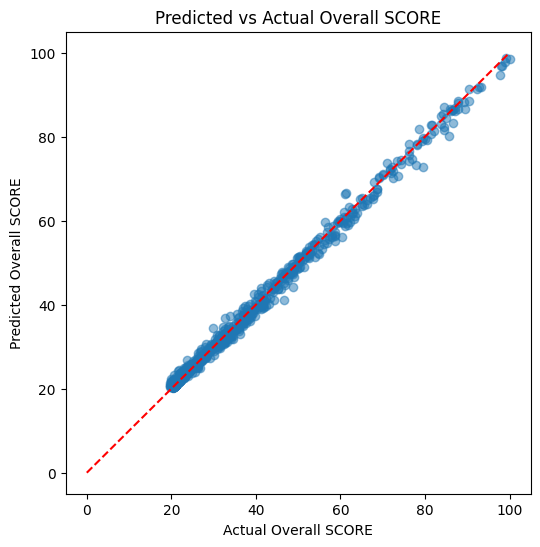

In [17]:
mask_known = df['Overall SCORE'].notnull()
y_true = df.loc[mask_known, 'Overall SCORE']  
y_pred = model.predict(df.loc[mask_known, features]) 

print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([0,100],[0,100], color='red', linestyle='--') 
plt.xlabel("Actual Overall SCORE")
plt.ylabel("Predicted Overall SCORE")
plt.title("Predicted vs Actual Overall SCORE")
plt.show()

Для восстановления пропущенных значений Overall Score была обучена модель RandomForestRegressor. Качество модели (R² = 0.997, MAE = 0.42, RMSE = 0.89) показывает, что предсказания надёжны и могут быть использованы для последующего анализа. График Predicted vs Actual демонстрирует высокое качество модели - точки плотно лежат на диагонали, что подтверждает точность предсказаний во всем диапазоне значений.

## Исследовательский анализ данных (EDA)

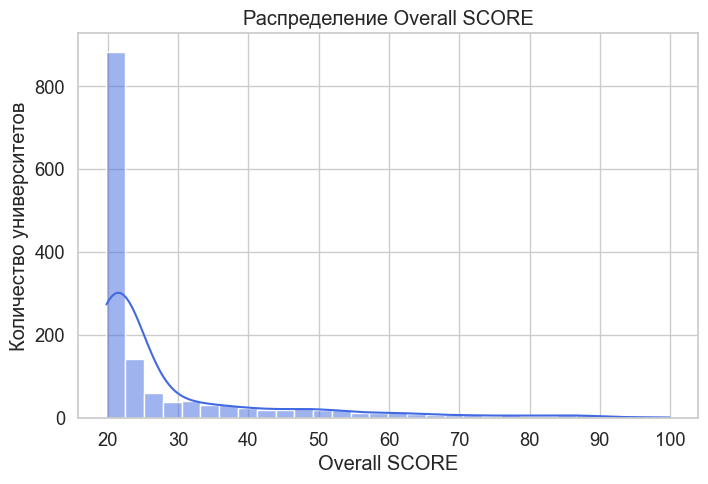

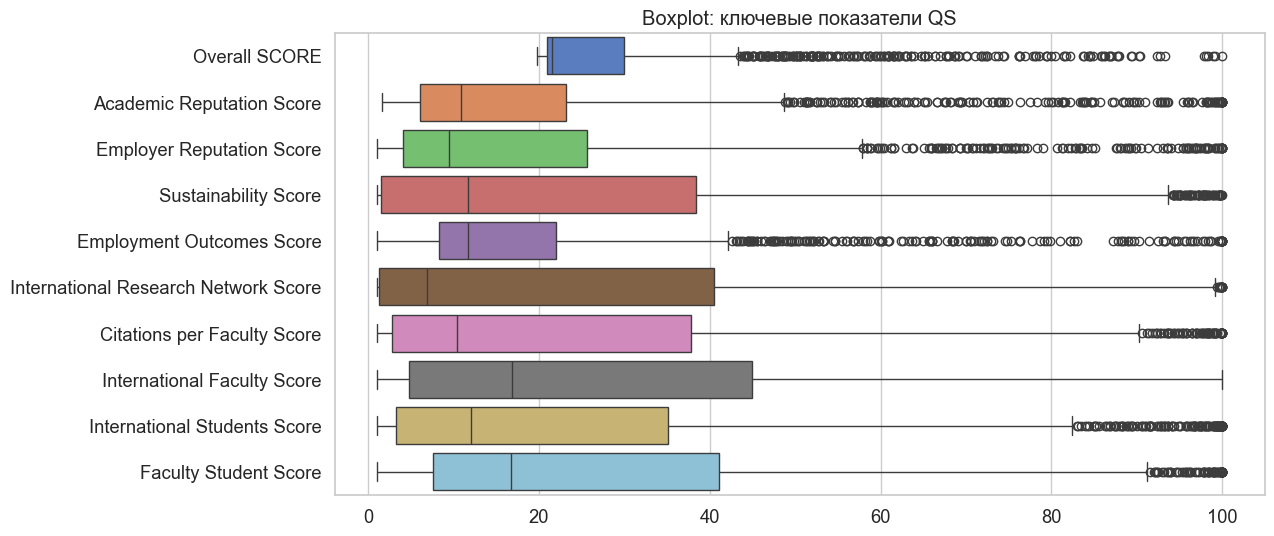

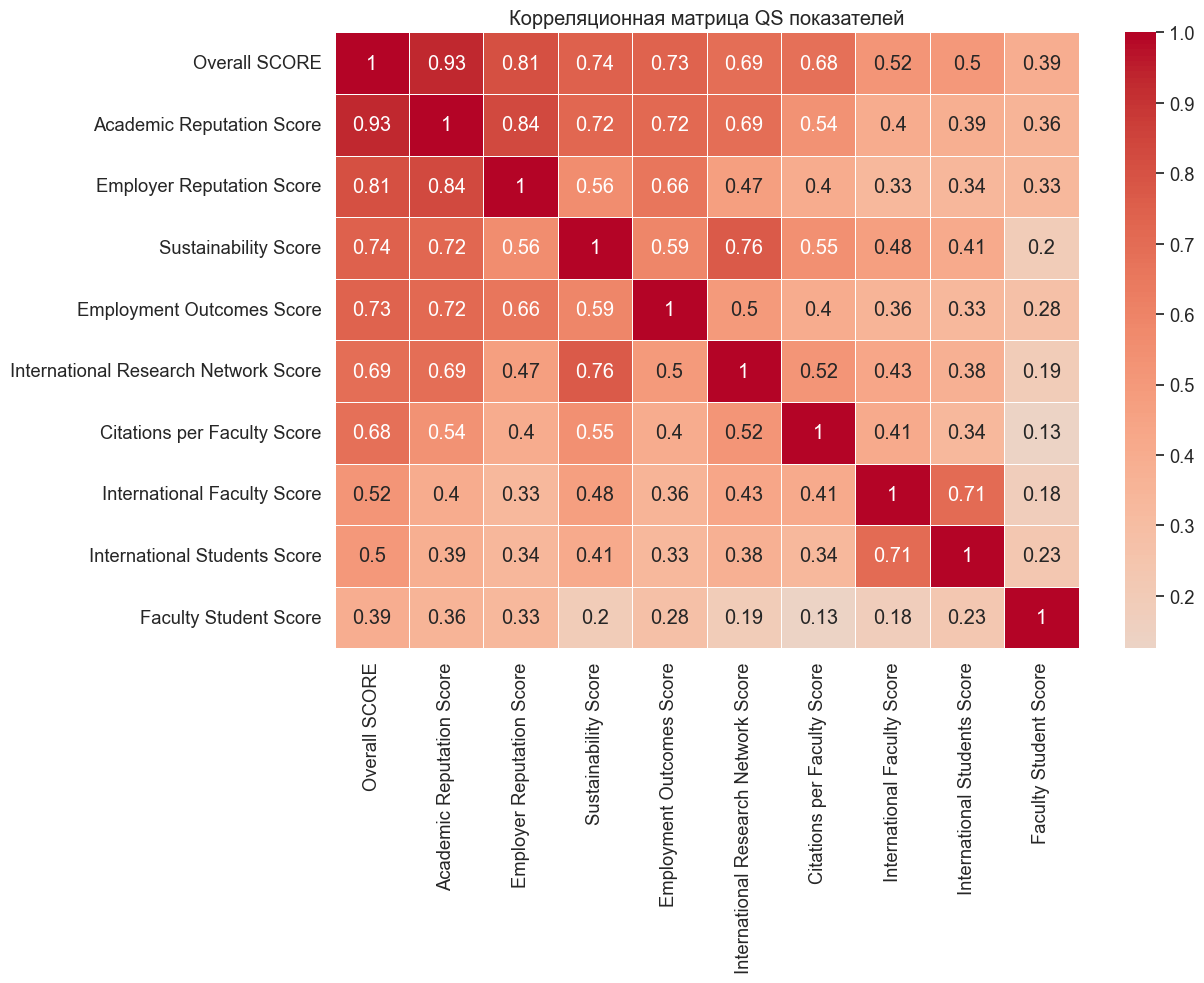

In [18]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(8,5))
sns.histplot(df['Overall SCORE'], bins=30, kde=True, color="royalblue")
plt.title("Распределение Overall SCORE")
plt.xlabel("Overall SCORE")
plt.ylabel("Количество университетов")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Overall SCORE', 'Academic Reputation Score', 'Employer Reputation Score',
                    'Sustainability Score', 'Employment Outcomes Score',              
                    'International Research Network Score', 'Citations per Faculty Score',          
                    'International Faculty Score', 'International Students Score',            
                    'Faculty Student Score']], orient="h")
plt.title("Boxplot: ключевые показатели QS")
plt.show()

plt.figure(figsize=(12,8))
corr = df[['Overall SCORE', 'Academic Reputation Score', 'Employer Reputation Score',
                    'Sustainability Score', 'Employment Outcomes Score',              
                    'International Research Network Score', 'Citations per Faculty Score',          
                    'International Faculty Score', 'International Students Score',            
                    'Faculty Student Score']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Корреляционная матрица QS показателей")
plt.show()

**1. Распределение Overall Score**

Распределение итоговых баллов оказалось правосторонним: большинство университетов набирают низкие значения (20–40), и лишь небольшая часть достигает 80+. Такая форма кривой соответствует логике рейтинга: высокие позиции занимают единичные ведущие университеты, тогда как основная масса вузов сосредоточена в нижней части списка.

Вывод: данные реалистичны и соответствуют ожиданиям QS Rankings. Высокий рейтинг — это исключительная характеристика, доступная лишь небольшой группе ведущих мировых университетов.

**2. Выбросы в отдельных метриках**

Все показатели демонстрируют правостороннюю асимметрию — низкие медианы и множественные выбросы сверху указывают на то, что высокие баллы доступны лишь небольшой группе элитных университетов.

Два типа показателей по вариативности. Наибольший разброс наблюдается у показателей интернационализации (International Faculty/Students), исследовательских метрик (International Research Network, Citations per Faculty), а также у относительно новых направлений (Sustainability). Это гибкие метрики, по которым университеты могут выбирать разные стратегии развития. Faculty Student Score также входит в эту группу, так как определяется внутренней политикой университета.

Репутационные и зависимые показатели ведут себя иначе. Academic и Employer Reputation, а также Employment Outcomes (тесно связанный с репутацией) показывают более узкий диапазон при сохранении асимметрии. Эти показатели труднее изменить — они формируются десятилетиями и не поддаются быстрому улучшению.

Большой разброс по гибким метрикам даёт шанс для быстрого роста, а узкий диапазон репутационных показателей объясняет устойчивость лидеров — их сложно догнать.

**3. Корреляционный анализ**

Overall Score показывает очень высокую корреляцию с Academic Reputation (0.93) — эти метрики почти идентичны. Сильные корреляции с Employer Reputation (0.81), Sustainability (0.74), Employment Outcomes (0.73) и International Research Network (0.69) подтверждают их весомый вклад в итоговый балл. Самая слабая связь с Faculty Student Score (0.39) отражает его меньшее влияние на рейтинг.
Academic Reputation — сильно коррелирует с Employer Reputation (0.84), Sustainability (0.72), Employment Outcomes (0.72) и International Research Network (0.69). Это подтверждает роль академической репутации как мета-индикатора общего качества университета.
International Faculty сильно коррелирует с International Students (0.71) — университеты с международным составом преподавателей активнее привлекают иностранных студентов.
Sustainability сильно коррелирует с International Research Network (0.76) — устойчивое развитие тесно связано с глобальным научным сотрудничеством.
Faculty Student Score показывает минимальные корреляции со всеми остальными показателями (0.13-0.39), что указывает на его независимость от репутации, интернационализации и исследовательской деятельности.

**Общий вывод**

Исследовательский анализ подтвердил корректность данных. Распределения и корреляции выглядят логичными и соответствуют методологии QS. Полученные результаты можно использовать для построения моделей и дальнейшего анализа влияния различных факторов на позицию университетов в мировом рейтинге.

Feature Importance анализ.

C:\Users\PSW\AppData\Local\Temp\ipykernel_20228\3980137141.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="viridis")


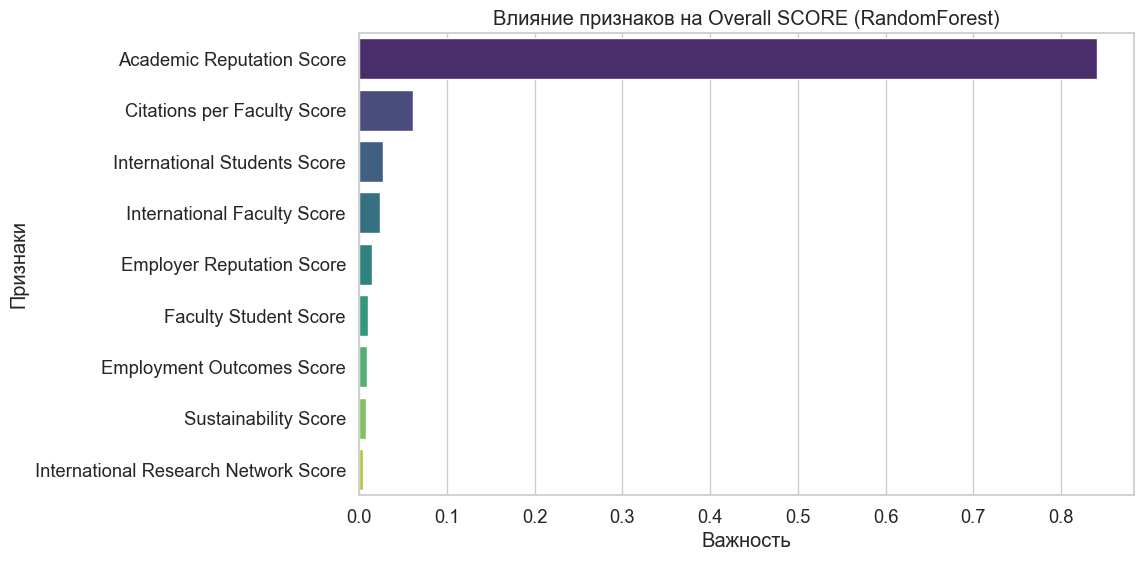

In [21]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette="viridis")
plt.title("Влияние признаков на Overall SCORE (RandomForest)")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

Random Forest модель показала, что Academic Reputation Score имеет важность около 85%, значительно превосходя все остальные показатели. На первый взгляд это противоречит официальным весам QS (где Academic Reputation составляет 30%), но детальный анализ выявил причину.

Academic Reputation сильно связан с большинством других показателей — коэффициенты корреляции составляют 0.69-0.84 с Employer Reputation, Sustainability, Employment Outcomes и International Research Network. Это означает, что университеты с высокой академической репутацией, как правило, показывают хорошие результаты по всем направлениям.

Модель "обнаружила", что зная Academic Reputation, можно предсказать не только его собственный вклад в рейтинг, но и косвенно оценить другие показатели. Поэтому Random Forest использует этот признак как основной для принятия решений.

Практический вывод: Academic Reputation — это не просто один из компонентов рейтинга, а комплексный показатель, отражающий общий уровень университета. Инвестиции в академическую репутацию с высокой вероятностью улучшат и другие метрики рейтинга.

Визуализация корреляций компонентов с Overall Score

C:\Users\PSW\AppData\Local\Temp\ipykernel_20228\3066398930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_scores.values, y=top_corr_scores.index, palette="viridis")


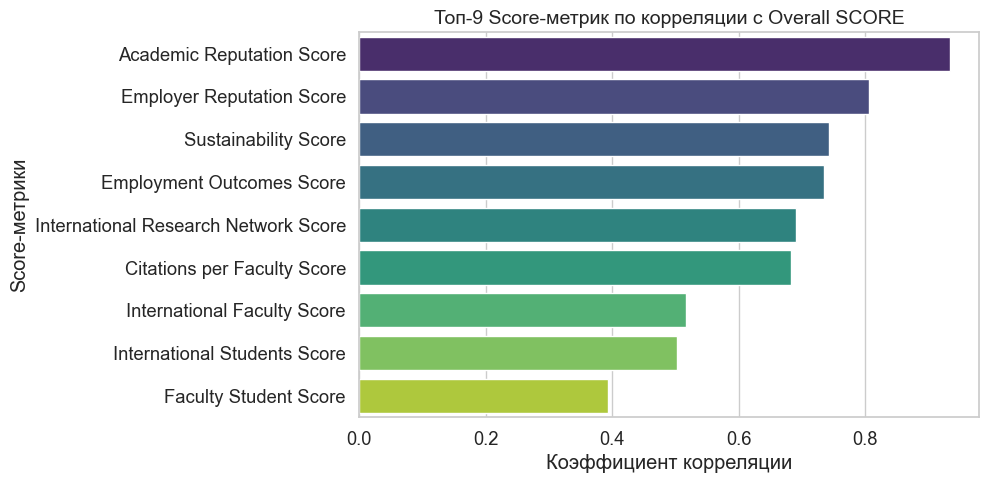

Корреляции Score-метрик с Overall SCORE:
Academic Reputation Score               0.933041
Employer Reputation Score               0.805663
Sustainability Score                    0.742573
Employment Outcomes Score               0.734110
International Research Network Score    0.689798
Citations per Faculty Score             0.682331
International Faculty Score             0.516944
International Students Score            0.502895
Faculty Student Score                   0.393243
dtype: float64


In [22]:
score_cols = [col for col in df.columns if "Score" in col and col != "Overall SCORE"]

correlations_scores = df[score_cols].corrwith(df['Overall SCORE'])

top_corr_scores = correlations_scores.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr_scores.values, y=top_corr_scores.index, palette="viridis")

plt.title("Топ-9 Score-метрик по корреляции с Overall SCORE", fontsize=14)
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Score-метрики")
plt.show()

print("Корреляции Score-метрик с Overall SCORE:")
print(correlations_scores.sort_values(ascending=False))

Визуализация корреляций раскрывает чёткую иерархию факторов, влияющих на итоговый рейтинг QS.

На вершине находится Academic Reputation с корреляцией 0.93 — это практически определяющий фактор. Университеты с сильной академической репутацией редко имеют низкие Overall Score, что объясняет доминирование этого показателя в модели Random Forest (85% важности).

Второй эшелон (0.68-0.81) формируют показатели, связанные с влиянием университета на рынок труда и общество: репутация среди работодателей, устойчивое развитие, результаты трудоустройства, цитируемость научных публикаций и международное научное сотрудничество. Эти факторы действуют взаимосвязанно — университеты, сильные в одном, обычно сильны и в других.

Международные метрики (International Faculty/Students) занимают среднюю позицию (0.5-0.52), указывая на их важность, но не критичность для высокого рейтинга.

Faculty Student Score выделяется своей независимостью (0.39) — университет может иметь отличное соотношение преподавателей и студентов, но это само по себе не обеспечивает лидерство в рейтинге.

# ВЫВОДЫ

Анализ выявил, что Academic Reputation тесно связана с большинством других показателей успеха (корреляции 0.69-0.84). Университеты с высокой академической репутацией демонстрируют хорошие результаты и по другим направлениям, что объясняет доминирование этого показателя в модели.

**Рекомендации**

Для большинства университетов (нижние 75% рейтинга):

Требуется долгосрочная стратегия. Academic Reputation формируется годами, но системные инвестиции в неё положительно влияют на другие показатели. Faculty Student Score слабо коррелирует с остальными метриками (0.13-0.39), поэтому требует отдельного внимания. Работу с работодателями следует начинать как можно раньше, учитывая медленный рост Employer Reputation.

Для университетов выше среднего (топ-25%):

Открываются возможности для дальнейшего продвижения через International Faculty и International Students — показатели с большим разбросом между вузами. Sustainability остаётся относительно новым направлением для создания конкурентного преимущества.

Для лидеров рейтинга:

Необходимо поддерживать высокий уровень по всем метрикам. Citations per Faculty и International Research Network критически важны, так как именно они отличают глобальных лидеров.

Общий вывод:

Стратегия зависит от текущей позиции университета и доступных ресурсов. Однако Academic Reputation остаётся приоритетом для всех категорий вузов, так как этот показатель служит основой для улучшения позиций по другим направлениям рейтинга.